In [1]:
# -*- coding: UTF-8 -*-
import pandas as pd

### Load Data

In [2]:
input_data = pd.read_csv("input_data.csv", index_col=False)
if 'Unnamed: 0' in input_data.columns:
    input_data = input_data.drop(columns=[input_data.columns[0]])
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162600 entries, 0 to 162599
Data columns (total 11 columns):
广告id      162600 non-null int64
广告请求日期    162600 non-null object
出价        162600 non-null int64
人群定向      162600 non-null object
播放时段      162600 non-null object
广告行业id    162600 non-null object
商品类型      162600 non-null int64
商品id      162600 non-null int64
广告账户id    162600 non-null int64
素材尺寸      162600 non-null float64
曝光次数      162600 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 13.6+ MB


In [3]:
input_data.columns

Index(['广告id', '广告请求日期', '出价', '人群定向', '播放时段', '广告行业id', '商品类型', '商品id',
       '广告账户id', '素材尺寸', '曝光次数'],
      dtype='object')

In [4]:
print("#广告id：", len(input_data.广告id.unique()))
print("#广告请求日期：", len(input_data.广告请求日期.unique()))
      
df_广告行业id = input_data.广告行业id.str.split(',', expand=True)
unique_广告行业id = []
for col in df_广告行业id.columns:
    unique_广告行业id.extend(df_广告行业id[col].unique())
# print(unique_广告行业id)
print("#广告行业id：", len(unique_广告行业id))      

print("#商品类型：", len(input_data.商品类型.unique()))

print("#商品id：", len(input_data.商品id.unique()))

print("#广告账户id：", len(input_data.广告账户id.unique()))

print("#素材尺寸：", len(input_data.素材尺寸.unique()))

#广告id： 26817
#广告请求日期： 32
#广告行业id： 273
#商品类型： 10
#商品id： 11751
#广告账户id： 8802
#素材尺寸： 24


In [5]:
fn_ad_feat = 'testA/ad_static_feature.out'
names_ad_feat = ["Ad_ID", 
                 "Created_Time",
                 "Account_ID",
                 "Item_ID",
                 "Item_Type",
                 "Industry_ID",
                 "Ad_Size"]
df_ad_feat = pd.read_table(fn_ad_feat, 
                           names=names_ad_feat,
                           sep = '\t', 
                           index_col=False)

fn_ad_dynamic_feat = "ad_dynamic_feature.csv"
df_ad_dynamic_feat = pd.read_csv(fn_ad_dynamic_feat)
df_ad_dynamic_feat.columns = ['Ad_ID', 'Created_Modified_Time', 'Bid', 'Target_People', 'Exposure_Inteval', 
                              'Ad_Status', 'Ad_Init_Time', 'Ad_End_Time','Operation_Type', 'Modified_Type', 
                              'Modified_Value']
df_ad_dynamic_feat = df_ad_dynamic_feat.loc[df_ad_dynamic_feat.Ad_Status==1, :]

df_merge_new = pd.merge(left=df_ad_dynamic_feat, right=df_ad_feat, on="Ad_ID")

/Users/donald/anaconda3/envs/tf36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print("#广告id：", len(df_merge_new.Ad_ID.unique()))

df_Industry_id = df_merge_new.Industry_ID.str.split(',', expand=True)
unique_Industry_ids = []
for col in df_Industry_id.columns:
    unique_Industry_ids.extend(df_Industry_id[col].unique())
unique_Industry_ids = [i for i in unique_Industry_ids if i]
print("#广告行业id：", len(unique_Industry_ids))
print("#商品类型：", len(df_merge_new.Item_Type.unique()))
print("#商品id：", len(df_merge_new.Item_ID.unique()))
print("#广告账户id：", len(df_merge_new.Account_ID.unique()))
print("#素材尺寸：", len(df_merge_new.Ad_Size.unique()))

#广告id： 37213
#广告行业id： 280
#商品类型： 10
#商品id： 18828
#广告账户id： 10975
#素材尺寸： 44


In [7]:
df_merge_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403902 entries, 0 to 403901
Data columns (total 17 columns):
Ad_ID                    403902 non-null int64
Created_Modified_Time    403902 non-null int64
Bid                      403902 non-null int64
Target_People            403902 non-null object
Exposure_Inteval         403902 non-null object
Ad_Status                403902 non-null int64
Ad_Init_Time             403902 non-null int64
Ad_End_Time              403902 non-null int64
Operation_Type           403902 non-null object
Modified_Type            403902 non-null int64
Modified_Value           403902 non-null object
Created_Time             403902 non-null int64
Account_ID               403902 non-null int64
Item_ID                  403902 non-null object
Item_Type                403902 non-null int64
Industry_ID              403902 non-null object
Ad_Size                  339277 non-null object
dtypes: int64(10), object(7)
memory usage: 55.5+ MB


In [8]:
fn_test = "testA/test_sample.dat"
df_test = pd.read_csv(fn_test, names=['样本id', '广告id', '广告创建时间', '素材尺寸', '广告行业id', '商品类型',
       '商品id', '广告账户id', '播放时段','人群定向', '出价'], sep='\t')

In [15]:
print("#广告id：", len(df_test.广告id.unique()))
      
print("#广告行业id：", len(df_test.广告行业id.unique()))      

print("#商品类型：", len(df_test.商品类型.unique()))

print("#商品id：", len(df_test.商品id.unique()))

print("#广告账户id：", len(df_test.广告账户id.unique()))

print("#素材尺寸：", len(df_test.素材尺寸.unique()))

#广告id： 1954
#广告行业id： 125
#商品类型： 10
#商品id： 872
#广告账户id： 1104
#素材尺寸： 20


### EDA

In [16]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

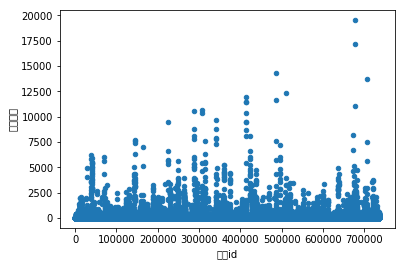

In [17]:
# 广告Id vs. 曝光次数
input_data.plot.scatter(x='广告id', y='曝光次数')

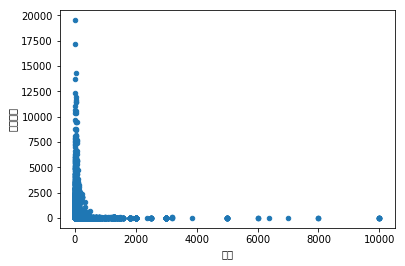

In [18]:
# 出价 vs. 曝光次数
input_data.plot.scatter(x='出价', y='曝光次数')

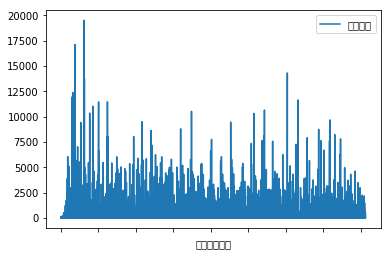

In [19]:
# 广告请求日期 vs. 曝光次数
input_data.plot(x='广告请求日期', y='曝光次数')

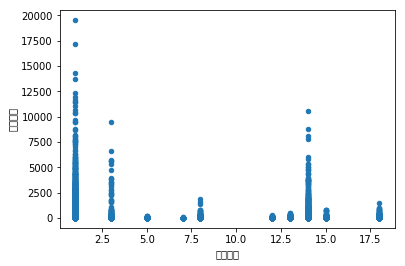

In [20]:
# 商品类型 vs. 曝光次数
input_data.plot.scatter(x='商品类型', y='曝光次数')

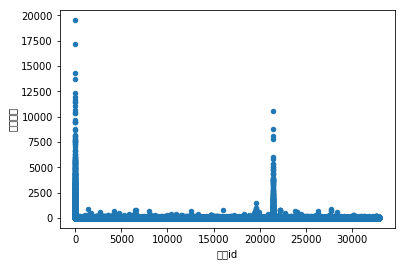

In [21]:
# 商品id vs. 曝光次数
input_data.plot.scatter(x='商品id', y='曝光次数')

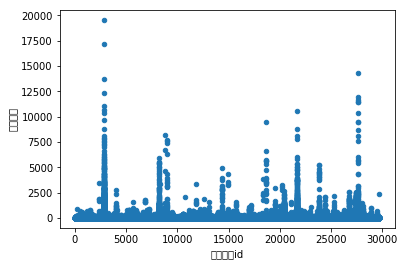

In [22]:
# 广告账户id vs. 曝光次数
input_data.plot.scatter(x='广告账户id', y='曝光次数')

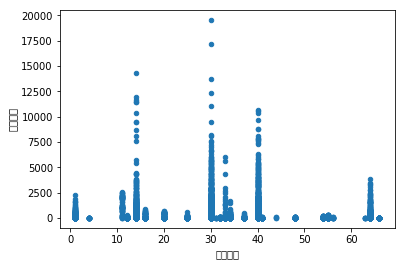

In [23]:
# 素材尺寸 vs. 曝光次数
input_data.plot.scatter(x='素材尺寸', y='曝光次数')

In [24]:
import numpy as np
import seaborn as sns

In [25]:
# selected_cols = ['广告id', 
#                  '出价', 
#                  '广告请求日期', 
#                  '商品类型', 
#                  '商品id', 
#                  '广告账户id', 
#                  '曝光次数']
corr = input_data.corr()

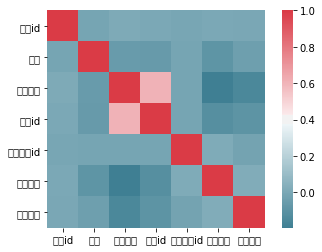

In [26]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)